**MASTER'S DEGREE IN APPLIED ARTIFICIAL INTELLIGENCE**.

**Course: TC5035.10 - Integration project**

Tecnológico de Monterrey

Professor Dr. Horacio Martínez Alfaro

**Week 2, Activity 1**

Exploratory data analysis

---

*   **Student:** Jorge Antonio Acosta Rosales
*   **Registration:** A01381552
*   **Student:** Israel Luján González
*   **Registration:** A01794693

## **Part 0.** Problem Context and Team Objective

Despite being taught by several institutions and supported by the government, Mexican Sign Language (LSM) still lacks sufficient digitalization. This limits the development of accessibility tools for people with hearing or speech impairments, as well as resources that could help bridge the communication gap between them and individuals without such disabilities who wish to communicate with them.

The goal of our machine learning project is to build a solid, well-structured dataset and develop automatic classification methods that simplify the labeling process. This dataset is intended to serve as a foundational resource for future projects—whether supervised or unsupervised—that aim to create real-time sign language translation tools.

Our project focuses on creating a universal web platform for data capture, using machine learning models to detect hand landmarks and employing our own ML classifier to recognize specific gestures. Due to time constraints, the current version of the project concentrates on static gestures only. However, work is ongoing to develop solutions for dynamic gestures that future teams can continue to build upon.

Finally, we also propose the use of generative AI models to perform style transfer, enhance registered images, and generate synthetic data under varied lighting conditions. This will further enrich the dataset and improve the performance of our classification model.

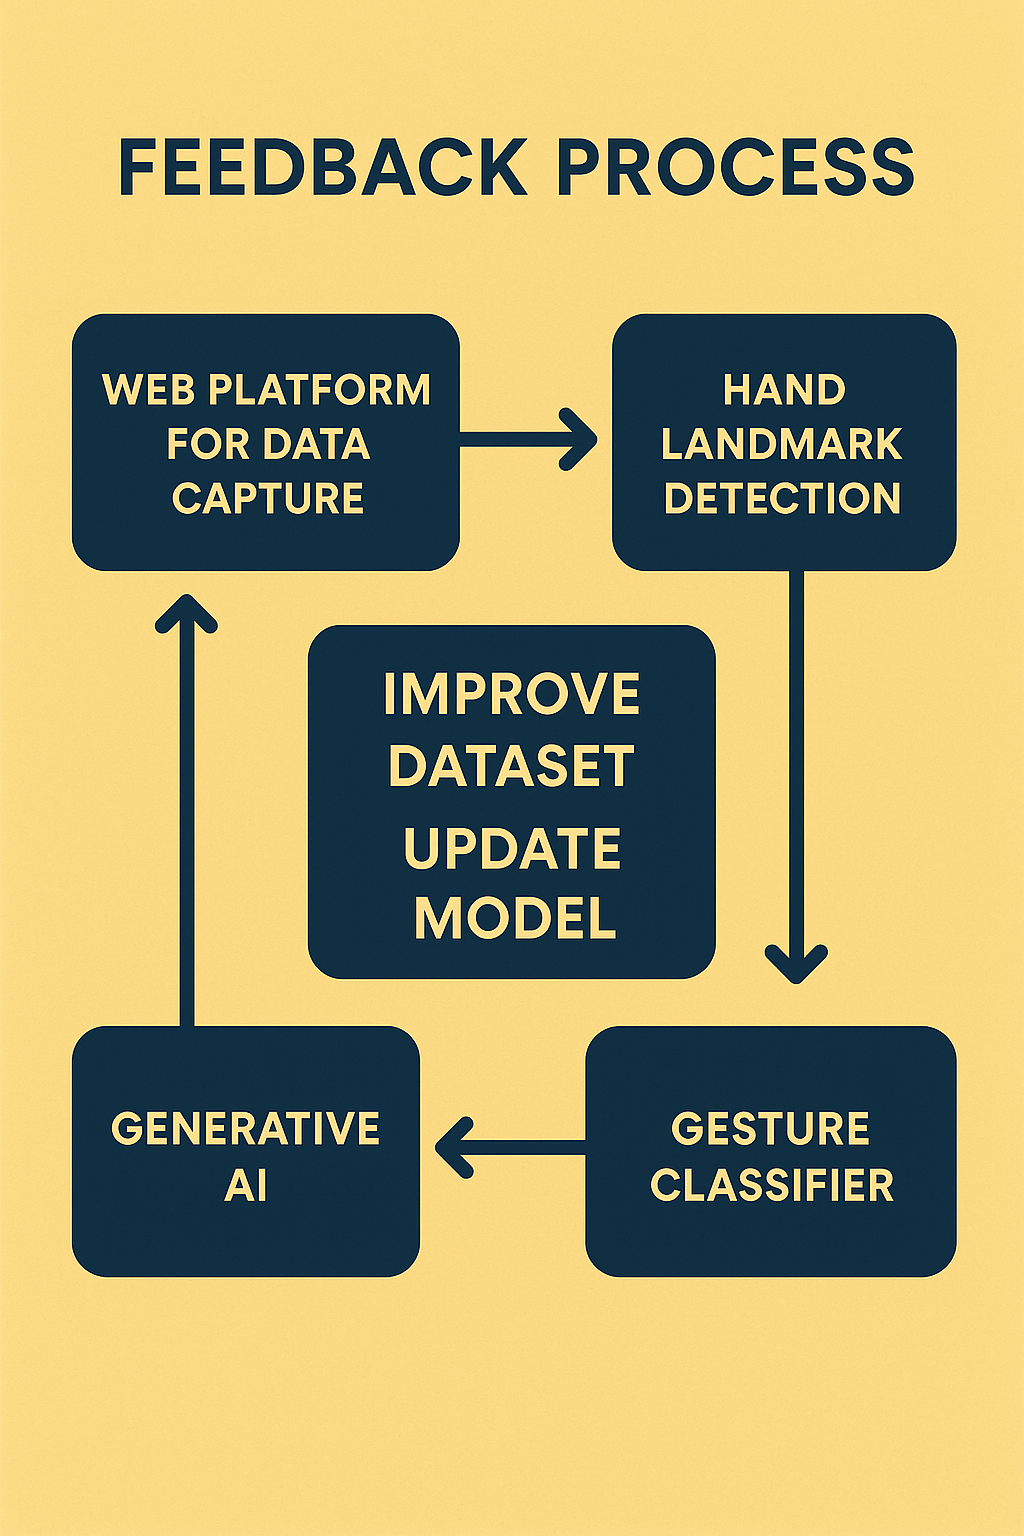

# **Part 1**. EDA and preprocessing

### Obtaining descriptive statistics for all the variables in the dataframe. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os

In [99]:
# Load variables from .env file for local development or get it from the environment variables in production
try:
    from dotenv import load_dotenv
    load_dotenv()
except ImportError:
    pass  # Safe fallback if it's not available in prod

base_path = os.getenv("LSM_BASE")
if not base_path:
    raise ValueError("❌ Environment variable 'LSM_BASE' is not set!")

gestures_csv_path = os.path.join(base_path, "data", "metadata", "gestures_flat.csv")

In [100]:
# Load CSV file
gestures_raw_df = pd.read_csv(gestures_csv_path)

print("Summary of the datatypes and the values in the gestures dataset:")
display(gestures_raw_df.head())

Summary of the datatypes and the values in the gestures dataset:


file_name label  width  height  hand_count  hadedness_left  \
0  A_b9b32d87.jpg     A    640     640           1               0   
1  A_d2b5d17d.jpg     A    640     640           1               0   
2  A_9ff361f9.jpg     A    640     640           1               1   
3  A_e7bea9a5.jpg     A    640     640           1               0   
4  A_750b0c55.jpg     A    640     640           1               0   

   hadedness_right  confidence_left  confidence_right  right_x0  ...  \
0                1              NaN          0.997785  0.798897  ...   
1                1              NaN          0.997479  0.381789  ...   
2                0         0.987826               NaN       NaN  ...   
3                1              NaN          0.985266  0.439434  ...   
4                1              NaN          0.984593  0.271182  ...   

   left_z17  left_x18  left_y18  left_z18  left_x19  left_y19  left_z19  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2 -0.061392   0.71582  0.278875 -0.096776  0.671791  0.374887 -0.068303   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

   left_x20  left_y20  left_z20  
0       NaN       NaN       NaN  
1       NaN       NaN       NaN  
2  0.657775  0.440908 -0.035481  
3       NaN       NaN       NaN  
4       NaN       NaN       NaN  

[5 rows x 155 columns]

In [101]:
print("-" * 50)
print("Basic information about the dataset:")
print("-" * 50)
gestures_raw_df.info()

print("-" * 50)
print("Summary of datatypes in the dataset:")
print("-" * 50)
gestures_raw_df.dtypes

--------------------------------------------------
Basic information about the dataset:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Columns: 155 entries, file_name to left_z20
dtypes: float64(148), int64(5), object(2)
memory usage: 1.5+ MB
--------------------------------------------------
Summary of datatypes in the dataset:
--------------------------------------------------


file_name      object
label          object
width           int64
height          int64
hand_count      int64
               ...   
left_y19      float64
left_z19      float64
left_x20      float64
left_y20      float64
left_z20      float64
Length: 155, dtype: object

In [102]:
numerical_columns = gestures_raw_df.select_dtypes(include = ['int', 'float']).columns
categorical_columns = gestures_raw_df.select_dtypes(include = ['object','category']).columns

print("Numerical columns: ", numerical_columns.to_list())
print("Categorical columns: ", categorical_columns.to_list())
print(f"Number of numerical columns: {len(numerical_columns)}")
print(f"Number of categorical columns: {len(categorical_columns)}")  

Numerical columns:  ['width', 'height', 'hand_count', 'hadedness_left', 'hadedness_right', 'confidence_left', 'confidence_right', 'right_x0', 'right_y0', 'right_z0', 'right_x1', 'right_y1', 'right_z1', 'right_x2', 'right_y2', 'right_z2', 'right_x3', 'right_y3', 'right_z3', 'right_x4', 'right_y4', 'right_z4', 'right_x5', 'right_y5', 'right_z5', 'right_x6', 'right_y6', 'right_z6', 'right_x7', 'right_y7', 'right_z7', 'right_x8', 'right_y8', 'right_z8', 'right_x9', 'right_y9', 'right_z9', 'right_x10', 'right_y10', 'right_z10', 'right_x11', 'right_y11', 'right_z11', 'right_x12', 'right_y12', 'right_z12', 'right_x13', 'right_y13', 'right_z13', 'right_x14', 'right_y14', 'right_z14', 'right_x15', 'right_y15', 'right_z15', 'right_x16', 'right_y16', 'right_z16', 'right_x17', 'right_y17', 'right_z17', 'right_x18', 'right_y18', 'right_z18', 'right_x19', 'right_y19', 'right_z19', 'right_x20', 'right_y20', 'right_z20', 'left_thumb_dist', 'left_thumb_angle', 'left_index_dist', 'left_index_angle', 'le

In [103]:
# Show the statistics of the numerical columns
gestures_raw_df[numerical_columns].describe()

width       height   hand_count  hadedness_left  hadedness_right  \
count  1258.0  1258.000000  1258.000000     1258.000000      1258.000000   
mean    640.0   639.491256     1.026232        0.451510         0.573132   
std       0.0     9.011369     0.159888        0.497841         0.494820   
min     640.0   480.000000     1.000000        0.000000         0.000000   
25%     640.0   640.000000     1.000000        0.000000         0.000000   
50%     640.0   640.000000     1.000000        0.000000         1.000000   
75%     640.0   640.000000     1.000000        1.000000         1.000000   
max     640.0   640.000000     2.000000        1.000000         1.000000   

       confidence_left  confidence_right    right_x0    right_y0  \
count       568.000000        721.000000  721.000000  721.000000   
mean          0.968812          0.971452    0.318561    0.625965   
std           0.064054          0.061472    0.180812    0.208204   
min           0.534142          0.538114   -0.024238   -0.033614   
25%           0.975494          0.978403    0.204641    0.480472   
50%           0.988918          0.991656    0.282760    0.640531   
75%           0.995807          0.996655    0.378067    0.794277   
max           0.999877          0.999880    1.012504    1.050673   

           right_z0  ...    left_z17    left_x18    left_y18    left_z18  \
count  7.210000e+02  ...  568.000000  568.000000  568.000000  568.000000   
mean   1.817077e-07  ...   -0.078692    0.658526    0.556176   -0.109786   
std    7.336274e-07  ...    0.063246    0.207329    0.205449    0.079741   
min   -2.191631e-06  ...   -0.392560    0.046958    0.081428   -0.473062   
25%   -1.853822e-07  ...   -0.118915    0.561543    0.406193   -0.162443   
50%    1.169713e-07  ...   -0.063643    0.712165    0.548372   -0.098373   
75%    4.538130e-07  ...   -0.034307    0.807528    0.701446   -0.053469   
max    3.716216e-06  ...    0.069667    1.042452    1.016376    0.098732   

         left_x19    left_y19    left_z19    left_x20    left_y20    left_z20  
count  568.000000  568.000000  568.000000  568.000000  568.000000  568.000000  
mean     0.644245    0.569156   -0.103571    0.641240    0.575379   -0.092892  
std      0.200066    0.202472    0.079743    0.198716    0.204334    0.080214  
min      0.083423    0.128393   -0.507794    0.093082    0.089571   -0.539588  
25%      0.554026    0.411245   -0.156252    0.555805    0.420612   -0.137256  
50%      0.687701    0.574831   -0.091622    0.686398    0.590205   -0.080835  
75%      0.785845    0.715115   -0.048889    0.781457    0.718367   -0.039688  
max      1.035022    1.030436    0.120211    1.030624    1.039827    0.116264  

[8 rows x 153 columns]

In [104]:
# Show the statistics of the categorical columns
gestures_raw_df[categorical_columns].describe()

file_name label
count             1258  1258
unique            1258    28
top     A_b9b32d87.jpg     S
freq                 1   156

# **Description of the dataset and their particularities.**

---

The summary statistics table shows data on width, height, hand count, and more, across 153 numeric columns. Observations: width is fixed at 640. Height shows some variation with a mean of 638.6, a standard deviation of 15, and a minimum of 480. Notably, the 25th, 50th, and 75th percentiles of height are all 640, suggesting a small subset of samples have a height of 480. This could indicate missing or inconsistent data in those few samples, with the majority showing a stable height of 640. However the script that captures the data, doesn't handle the resolution. so probably these values will vary in the future with more samples unless we decide to normalize the size of the image.

The height distribution shows that at least 25% of the samples have a height less than or equal to 640, but the minimum is 480. This implies only a few samples have a height of 480, while the rest are 640. The heights are likely split between static and dynamic images—static being 640x480 and dynamic possibly padded to 640x640. Hand count mainly shows one-handed captures, with very few two-handed ones. The handedness detection shows a binary presence, with about 46% detecting the left hand and 57% detecting the right.

It seems the data shows the presence of one hand in most samples, with a small proportion detecting both hands. The confidence values for both left and right hands are high, suggesting reliable detections. Some coordinate features for each hand are close together, but there are occasional outliers, especially in depth (z) values. The left hand has a significant number of missing coordinates (788 samples), while fewer samples miss the right hand. The missing data pattern aligns with the hand detection, indicating potential for dropping or imputing missing coordinates.

1. **Image dimensions**

   * **Width** is perfectly constant at **640 px** for *all* 1 460 images.
   * **Height** has two clusters: a **minimum of 480 px** (roughly 20% of cases) and **75th–100th percentiles at 640 px**, giving a mean of **638.6 px** (std ≈ 15 px).
     This suggests most images are square (640×640) but a minority remain at 640×480.

2. **Hand counts & handedness**

   * **hand\_count** has a mean of **1.046** (std ≈ 0.21), with a minimum of 1 and a maximum of 2.
     Only about 4–5% of samples contain two hands.
   * **hadedness\_left** mean≈ 0.46 and **hadedness\_right** mean≈ 0.57 reflect that the right hand is detected slightly more often than the left.

3. **Detection confidence**

   * **confidence\_left** has a mean of **0.962** (std ≈ 0.077), **confidence\_right** mean **0.966** (std ≈ 0.072).
     Both are very high on average, though the left side is slightly more variable and has a few low‐confidence outliers (min≈ 0.505).

4. **Landmark coordinates**

   * **X‐coordinates** for left‐hand keypoints (e.g. `left_x0`) average around **0.58–0.82** (std≈ 0.21–0.23), placing them on the right half of the frame.
   * **Y‐coordinates** (e.g. `left_y0` mean≈ 0.66, std≈ 0.21) cluster in the lower two‐thirds.
   * **Z‐coordinates** are essentially centered at zero (mean≈ 0, std on the order of 1e-6–0.1), indicating depth values aren’t very spread out.

5. **Missingness pattern**

   * You can see that **left\_* coordinates*\* have **672** non‐null entries (exactly the same as the count for `confidence_left`) and **right\_* coordinates*\* have **838** non‐null entries (matching `confidence_right`).
   * This shows the only time landmarks are missing is when a hand wasn’t detected—there’s *no random* missingness to worry about.

6. **Outliers**

   * The **min**/**max** of some X or Z coordinates occasionally go slightly negative (≈ –0.01 to –0.54) or above 1 (up to ≈ 1.06), which are detection artifacts you may want to clip or remove.
   * The unusual height of 480 px (vs 640 px) is also easily spotted as an “outlier” in the height distribution but likely reflects two different capture modes rather than errors.

---

These observations suggest:

* **Drop or encode** image **width** (constant) and possibly **z‐coordinates** (near zero) if they don’t add value.
* **Handle missing** hand landmarks by either **imputing zeros** or **treating left/right features separately** only when that hand is present.
* **Clip** any coordinate values outside \[0,1] or investigate those samples if they matter.
* Finally, we can move on to **visualize** the hand‐count and confidence distributions with histograms/boxplots and check the class balance in `label`.


# Missing Value Analysis

In [105]:
def print_missing_percentage(df: pd.DataFrame) -> pd.Series:
    """
    Print the missing values in a fancy way and also returns an series object from pandas with the mean percentage of missing values.

    Parameters:
    - df: DataFrame
    
    Returns:
    - series object from pandas with the mean percentage of missing values
    """
    # Determine the percentage of missing values per column
    missing_percentage = df.isnull().mean()

    # Determine the length of the longest column name
    max_length = max(len(column) for column in missing_percentage.keys())

    # Print the percentage of missing values
    print("Percentage of missing values per column:")
    for column, percentage in missing_percentage.items():
        print(f"{column:{max_length}} | {percentage * 100:.4f}%")
        
    return missing_percentage

In [106]:
missing_percentage = print_missing_percentage(gestures_raw_df)

Percentage of missing values per column:
file_name          | 0.0000%
label              | 0.0000%
width              | 0.0000%
height             | 0.0000%
hand_count         | 0.0000%
hadedness_left     | 0.0000%
hadedness_right    | 0.0000%
confidence_left    | 54.8490%
confidence_right   | 42.6868%
right_x0           | 42.6868%
right_y0           | 42.6868%
right_z0           | 42.6868%
right_x1           | 42.6868%
right_y1           | 42.6868%
right_z1           | 42.6868%
right_x2           | 42.6868%
right_y2           | 42.6868%
right_z2           | 42.6868%
right_x3           | 42.6868%
right_y3           | 42.6868%
right_z3           | 42.6868%
right_x4           | 42.6868%
right_y4           | 42.6868%
right_z4           | 42.6868%
right_x5           | 42.6868%
right_y5           | 42.6868%
right_z5           | 42.6868%
right_x6           | 42.6868%
right_y6           | 42.6868%
right_z6           | 42.6868%
right_x7           | 42.6868%
right_y7           | 42.6868%
right_

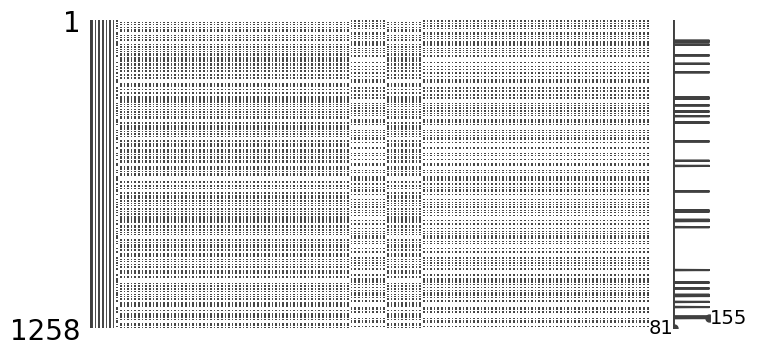

In [107]:
# Visualize missingness:
import missingno as msno
msno.matrix(gestures_raw_df, figsize=(8,4))
plt.show()


Using this information, we can infer that we have two classes of data, split between two hands. This makes sense because the majority of gestures use only one hand. However, we have to be cautious, as the image can be flipped along the X-axis, which may cause some false positives in the images analyzed by MediaPipe.

Also we detect that Mediapipe provide us the hand confidence so we can drop the other column of the hand where this value is less than the most important one. also in all of our sample we only have 33 images that contains both hands, so one strategy could be just to crop the images where the hand exists and then combine this information to train a better model.

In [108]:
# Work off a copy so you don’t overwrite your original
df = gestures_raw_df.copy()

# Replace NaNs in confidence with 0 so comparisons won’t break
df['confidence_left_f']  = df['confidence_left'].fillna(0)
df['confidence_right_f'] = df['confidence_right'].fillna(0)

# Decide which hand “wins” (higher confidence)
df['preferred_hand'] = np.where(
    df['confidence_left_f'] >= df['confidence_right_f'],
    'left',
    'right'
)

# Start your new DataFrame with the columns you still want
cols_to_keep = ['file_name','label','width','height','hand_count']
gestures_df = df[cols_to_keep].copy()

# Unified handedness & confidence
gestures_df['handedness'] = df['preferred_hand']
gestures_df['confidence']  = np.where(
    df['preferred_hand']=='left',
    df['confidence_left'],
    df['confidence_right']
)

# Pull in the 21 landmarks for whichever side was chosen
for axis in ('x','y','z'):
    for i in range(21):
        left_col  = f'left_{axis}{i}'
        right_col = f'right_{axis}{i}'
        new_col   = f'{axis}{i}'
        # choose left_<axis><i> if preferred_hand=='left', else right_<axis><i>
        gestures_df[new_col] = np.where(
            df['preferred_hand']=='left',
            df[left_col],
            df[right_col]
        )

# Pull in engineered distances & angles for just the winning hand
fingers = ["thumb","index","middle","ring","pinky"]
for finger in fingers:
    # distance feature
    gestures_df[f"{finger}_dist"] = np.where(
        df['preferred_hand']=='left',
        df[f'left_{finger}_dist'],
        df[f'right_{finger}_dist']
    )
    # angle feature
    gestures_df[f"{finger}_angle"] = np.where(
        df['preferred_hand']=='left',
        df[f'left_{finger}_angle'],
        df[f'right_{finger}_angle']
    )

# Keep only rows with hand_count not equal to 2
gestures_df = gestures_df[gestures_df['hand_count'] != 2].reset_index(drop=True)

In [109]:
gestures_df.head()

file_name label  width  height  hand_count handedness  confidence  \
0  A_b9b32d87.jpg     A    640     640           1      right    0.997785   
1  A_d2b5d17d.jpg     A    640     640           1      right    0.997479   
2  A_9ff361f9.jpg     A    640     640           1       left    0.987826   
3  A_e7bea9a5.jpg     A    640     640           1      right    0.985266   
4  A_750b0c55.jpg     A    640     640           1      right    0.984593   

         x0        x1        x2  ...  thumb_dist  thumb_angle  index_dist  \
0  0.798897  0.725475  0.570459  ...    0.615069   162.072725    0.428294   
1  0.381789  0.559909  0.685032  ...    0.621105   162.560841    0.425830   
2  0.606538  0.442157  0.319858  ...    0.611691   163.256617    0.438740   
3  0.439434  0.591480  0.702281  ...    0.568575   154.395800    0.312348   
4  0.271182  0.331742  0.484159  ...    0.570004   155.083940    0.312544   

   index_angle  middle_dist  middle_angle  ring_dist  ring_angle  pinky_dist  \
0   149.142996     0.400321    154.507508   0.375774  160.232554    0.366992   
1   148.724763     0.398358    155.136401   0.374649  161.810152    0.365546   
2   148.753663     0.392533    154.831782   0.359303  158.650349    0.356963   
3   130.816186     0.270621    131.528817   0.273953  142.488172    0.313761   
4   130.410206     0.271806    131.407179   0.275288  142.368124    0.316213   

   pinky_angle  
0   163.426065  
1   165.570584  
2   160.237081  
3   154.101684  
4   154.106598  

[5 rows x 80 columns]

We are going to check again the missing values in the dataset to validate our preprocessing steps.

In [110]:
missing_percentage = print_missing_percentage(gestures_df)

Percentage of missing values per column:
file_name    | 0.0000%
label        | 0.0000%
width        | 0.0000%
height       | 0.0000%
hand_count   | 0.0000%
handedness   | 0.0000%
confidence   | 0.0000%
x0           | 0.0000%
x1           | 0.0000%
x2           | 0.0000%
x3           | 0.0000%
x4           | 0.0000%
x5           | 0.0000%
x6           | 0.0000%
x7           | 0.0000%
x8           | 0.0000%
x9           | 0.0000%
x10          | 0.0000%
x11          | 0.0000%
x12          | 0.0000%
x13          | 0.0000%
x14          | 0.0000%
x15          | 0.0000%
x16          | 0.0000%
x17          | 0.0000%
x18          | 0.0000%
x19          | 0.0000%
x20          | 0.0000%
y0           | 0.0000%
y1           | 0.0000%
y2           | 0.0000%
y3           | 0.0000%
y4           | 0.0000%
y5           | 0.0000%
y6           | 0.0000%
y7           | 0.0000%
y8           | 0.0000%
y9           | 0.0000%
y10          | 0.0000%
y11          | 0.0000%
y12          | 0.0000%
y13          | 0

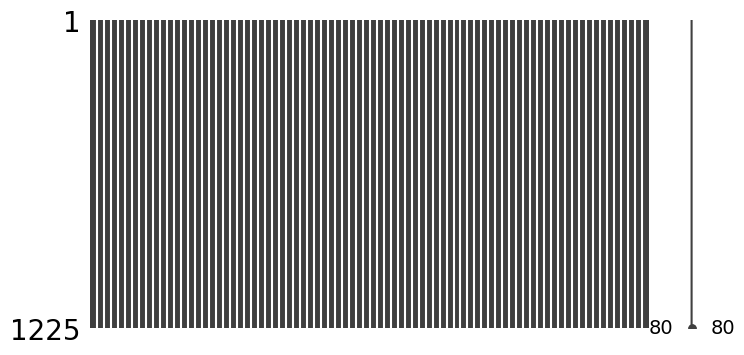

In [111]:
msno.matrix(gestures_df, figsize=(8,4))
plt.show()

Now we can drop the columns that are not useful for our analysis, like id, width, height, hand_count.

In [112]:
gestures_df.drop(
    columns=['file_name', 'width', 'height', 'hand_count'],
    inplace=True
)

In [113]:
# Updating numerical columns and categorical
numerical_columns = gestures_df.select_dtypes(include = ['int', 'float']).columns
categorical_columns = gestures_df.select_dtypes(include = ['object','category']).columns

print("Numerical columns: ", numerical_columns.to_list())
print("Categorical columns: ", categorical_columns.to_list())
print(f"Number of numerical columns: {len(numerical_columns)}")
print(f"Number of categorical columns: {len(categorical_columns)}")  

Numerical columns:  ['confidence', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10', 'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20', 'z0', 'z1', 'z2', 'z3', 'z4', 'z5', 'z6', 'z7', 'z8', 'z9', 'z10', 'z11', 'z12', 'z13', 'z14', 'z15', 'z16', 'z17', 'z18', 'z19', 'z20', 'thumb_dist', 'thumb_angle', 'index_dist', 'index_angle', 'middle_dist', 'middle_angle', 'ring_dist', 'ring_angle', 'pinky_dist', 'pinky_angle']
Categorical columns:  ['label', 'handedness']
Number of numerical columns: 74
Number of categorical columns: 2


# Analisis of outliers

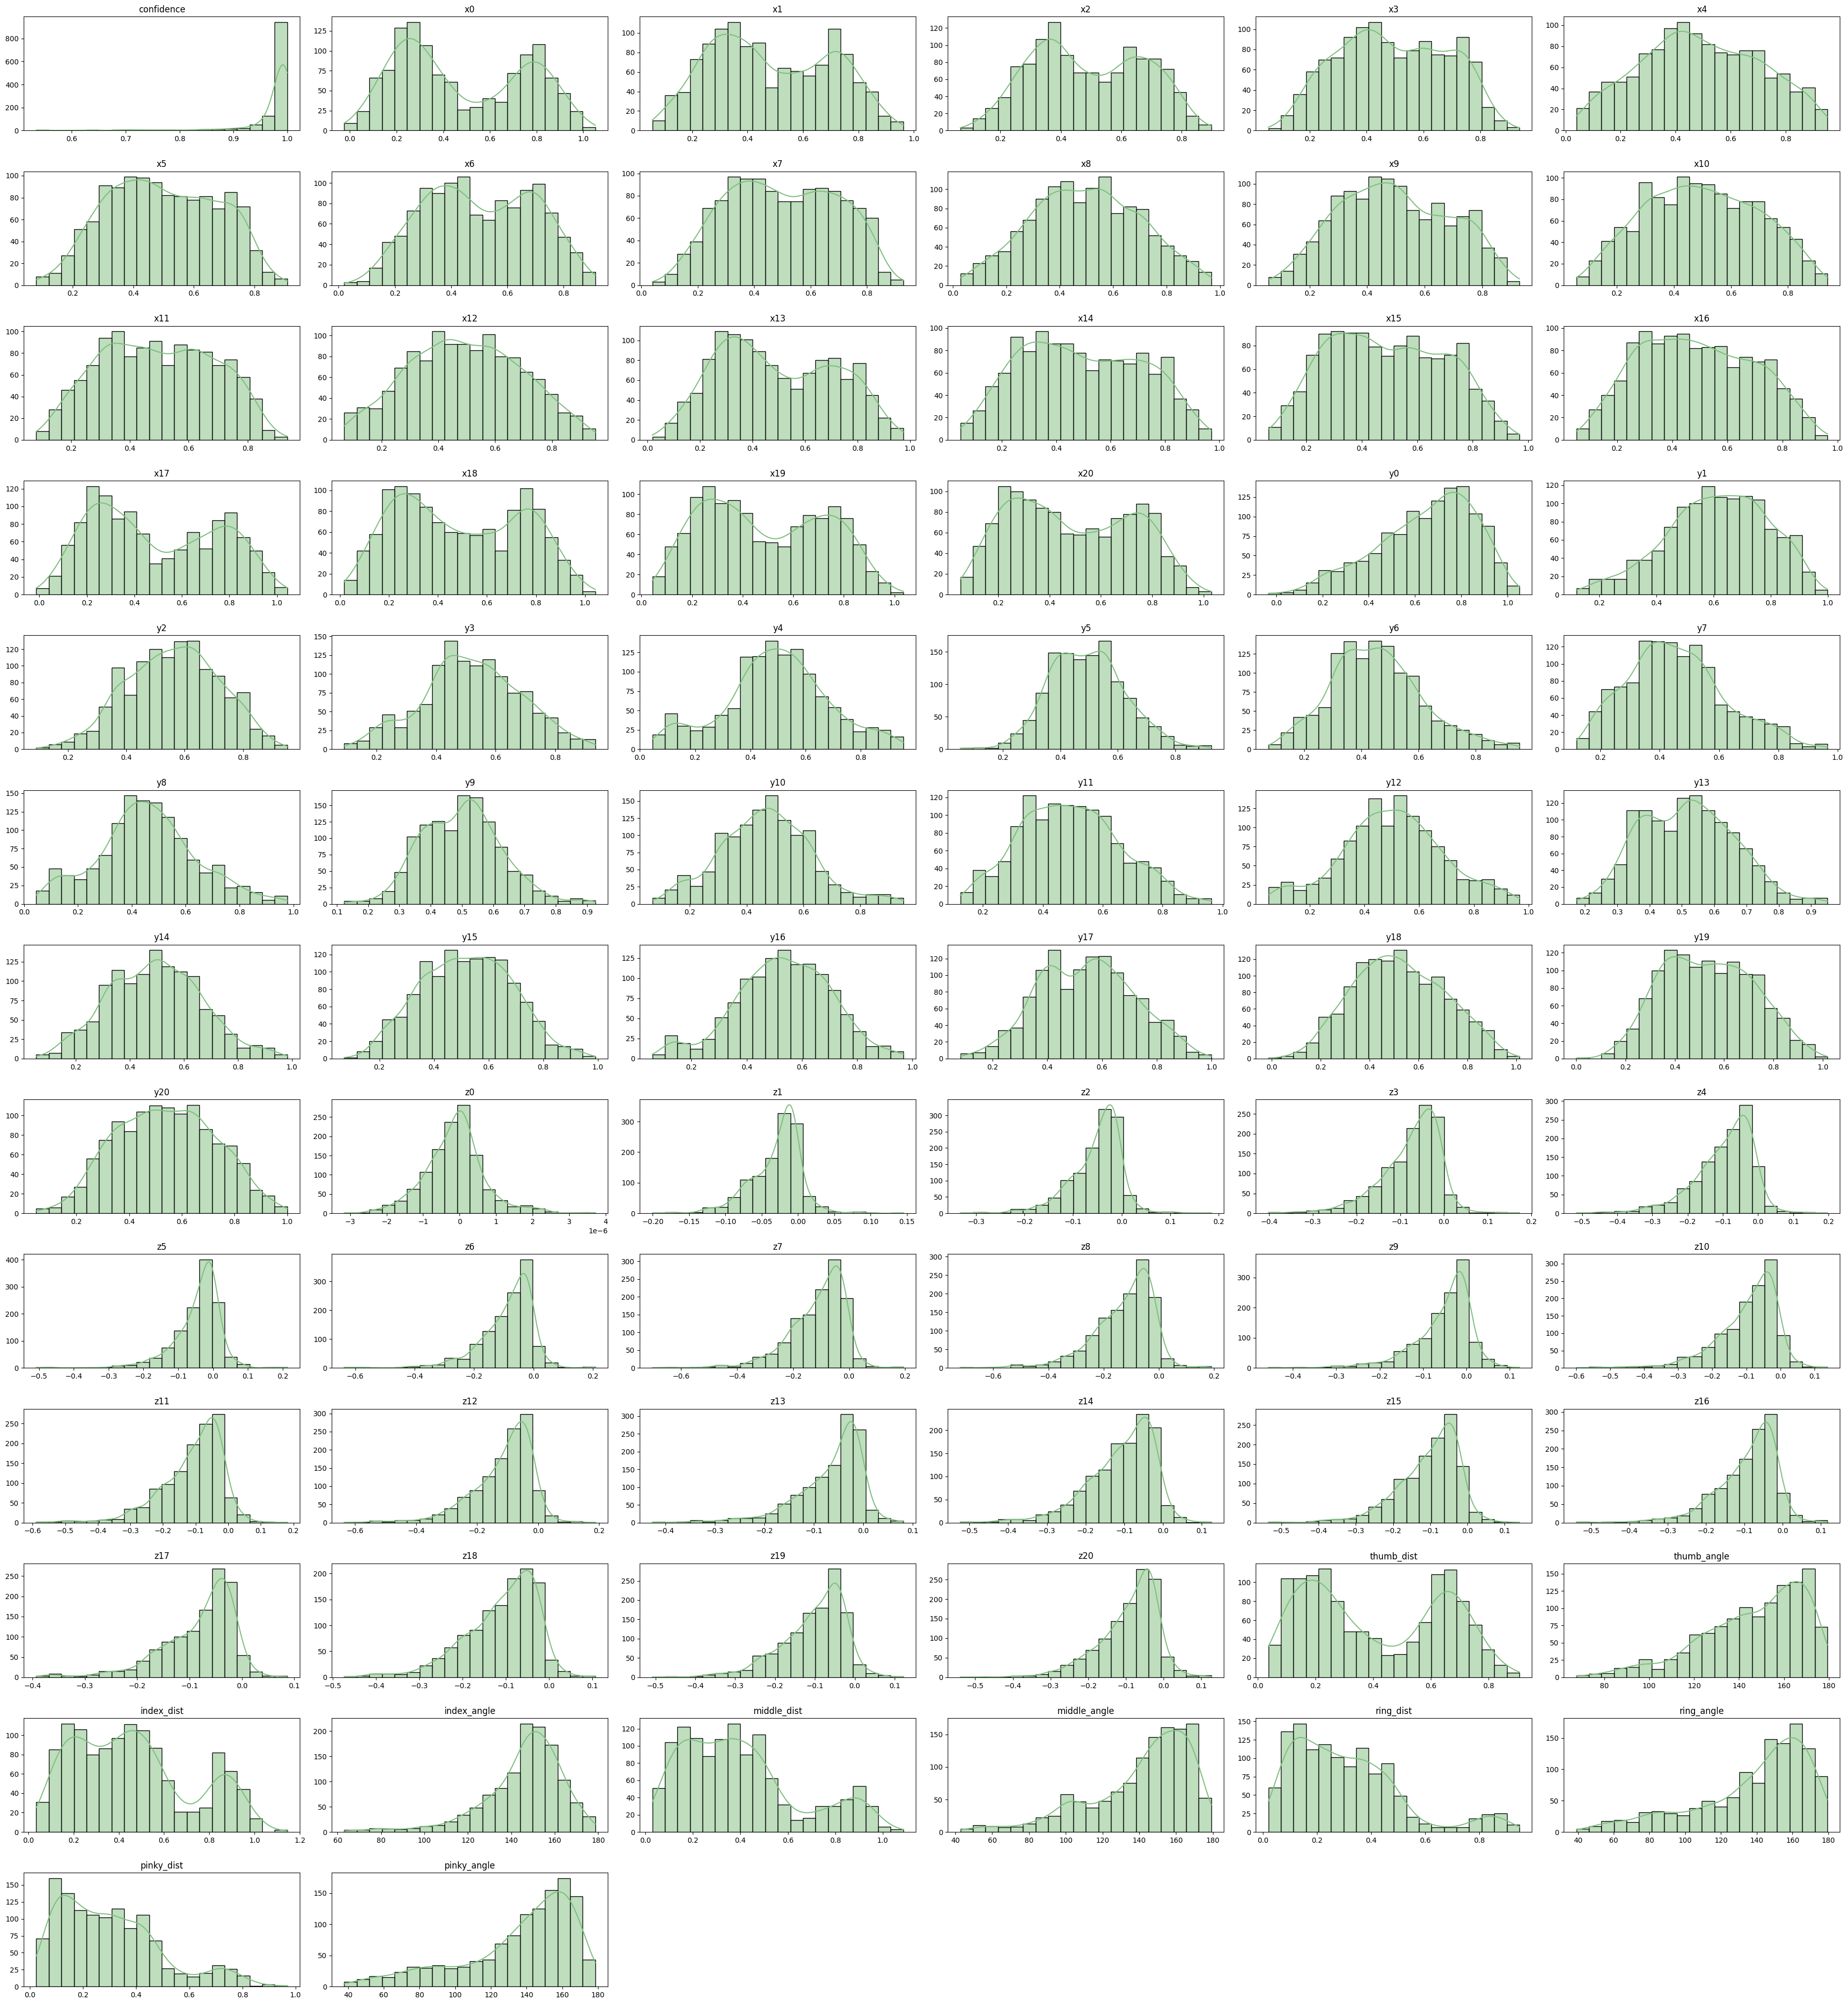

In [114]:
# Compute grid size
n = len(numerical_columns)
ncols = 6
nrows = math.ceil(n / ncols)

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 3*nrows))
axes = axes.flatten()

# Plot each histogram
for ax, col in zip(axes, numerical_columns):
    sns.histplot(gestures_df[col].dropna(), kde=True, bins=20, ax=ax, color='#7fbf7f')
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Turn off any unused axes
for ax in axes[n:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [115]:
# IQR method
def iqr_outliers(col):
    Q1, Q3 = col.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    return col[(col < Q1 - 1.5*IQR) | (col > Q3 + 1.5*IQR)]


outlier_counts = {col: iqr_outliers(gestures_df[col].dropna()).shape[0]
                  for col in numerical_columns}
# Show top 10 features with most IQR‐based outliers
for col, cnt in sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{col}: {cnt} outliers")

confidence: 144 outliers
z5: 64 outliers
z0: 61 outliers
z9: 59 outliers
ring_dist: 54 outliers
index_angle: 53 outliers
pinky_angle: 49 outliers
z13: 47 outliers
z1: 44 outliers
z2: 43 outliers


In [116]:
# Z-score method
from scipy.stats import zscore
zs = gestures_df[numerical_columns].apply(lambda x: zscore(x.fillna(x.mean()))).abs()
z_outliers = (zs > 3).sum().sort_values(ascending=False)[:10]
print("\nTop 10 columns by Z-score outliers (>3σ):")
print(z_outliers)


Top 10 columns by Z-score outliers (>3σ):
confidence     39
z2             24
index_angle    24
z5             22
z10            20
z6             20
z9             20
z13            20
z17            19
z7             19
dtype: int64


* **Detection Confidence**
  The vast majority of samples register confidence scores extremely close to 1.0, producing a sharp spike at the high end. This metric exhibits almost no variability, so while it may serve as a quality filter (e.g. discarding very low-confidence outliers), it contributes little discriminative power to the model.

* **X-Coordinate Landmarks (x0–x20)**
  All x-values lie between 0 and 1, confirming they’re already normalized. Many fingertip and joint positions display clear bimodal or multimodal patterns—certain gestures cluster landmarks on the left side of the frame (≈0.2–0.4) versus the right side (≈0.6–0.8). These distributional shapes carry semantic information about different signs. Because they’re on a consistent scale, no further normalization is required, though reducing dimensionality (e.g. via PCA) could help tame redundancy across 21 points.

* **Y-Coordinate Landmarks (y0–y20)**
  Similarly bound to \[0,1], the y-values form roughly bell-shaped curves, with means around 0.5–0.7. This reflects that hands tend to appear in the lower half of the image. The unimodal shapes and modest skew imply that no nonlinear transformation is necessary for these features.

* **Z-Coordinate Landmarks (z0–z20)**
  Depth coordinates center near zero but exhibit a rightward tail of positive values. While these are also on a small scale, their skew suggests a mild transformation (for example, `log1p` after shifting) could make them more symmetrically distributed if depth turns out to be predictive.

* **Outlier and Artifact Handling**
  A handful of landmark values fall slightly below 0 or exceed 1—these are clearly detection artifacts. I will clip or remove any coordinate outside the valid \[0,1] range to ensure consistency.

---

**Preprocessing Decisions**

1. **Drop or De-emphasize confidence** since it has near-zero variance.
2. **Clip all x/y/z values to \[0,1]**, eliminating any artifacts.
3. **Apply a gentle log-transform** to z-coordinates if needed to address skew.
4. **Consider dimensionality reduction** (PCA or an autoencoder) on the 63 landmark features to distill the most informative patterns.


# Categorical Variable Frequencies

In [117]:
print("Categorical cardinalities:")
for col in categorical_columns:
    uniq = gestures_df[col].nunique()
    print(f"  {col}: {uniq} unique values")

Categorical cardinalities:
  label: 28 unique values
  handedness: 2 unique values


In [118]:
# Compute skewness
skews = gestures_df[numerical_columns].skew().sort_values()
print("Top 10 most negative skews:\n", skews.head(10))
print("\nTop 10 most positive skews:\n", skews.tail(10))


Top 10 most negative skews:
 confidence    -4.311267
z5            -1.666801
z9            -1.607040
z6            -1.522920
z13           -1.507227
z10           -1.411300
index_angle   -1.358884
z17           -1.347596
z7            -1.327799
z16           -1.323964
dtype: float64

Top 10 most positive skews:
 y11            0.220369
y13            0.221605
x0             0.235847
y9             0.260741
y6             0.404372
y7             0.438870
index_dist     0.464610
middle_dist    0.766621
pinky_dist     0.875698
ring_dist      1.115047
dtype: float64


In [119]:
# List features with |skew| > 1
heavy = skews[skews.abs() > 1]
print(f"\nFeatures with |skew| > 1 ({len(heavy)}):\n", heavy)

# (Optional) Example transform:  
# gestures_df['some_feature_log'] = np.log1p(gestures_df['some_feature'])


Features with |skew| > 1 (24):
 confidence     -4.311267
z5             -1.666801
z9             -1.607040
z6             -1.522920
z13            -1.507227
z10            -1.411300
index_angle    -1.358884
z17            -1.347596
z7             -1.327799
z16            -1.323964
z12            -1.282725
z11            -1.255940
z8             -1.230995
z20            -1.138624
middle_angle   -1.127125
z14            -1.107807
z15            -1.103621
pinky_angle    -1.080990
ring_angle     -1.055147
z4             -1.044638
z18            -1.024968
z3             -1.015630
z19            -1.014032
ring_dist       1.115047
dtype: float64


In [120]:
print("\n--- Categorical Variable Frequencies ---")
for col in categorical_columns:
    print(f"\nValue Counts for {col}:")
    # Get value counts
    counts = gestures_df[col].value_counts(dropna=False) # Include NaNs in counts if present
    # Convert to DataFrame for better markdown formatting
    counts_df = pd.DataFrame({col: counts.index, 'Count': counts.values})
    # Attempt to sort by index if possible, otherwise sort by count
    try:
        counts_df = counts_df.sort_values(by=col)
    except TypeError:
        counts_df = counts_df.sort_values(by='Count', ascending=False)
    print(counts_df.to_markdown(index=False, numalign="left", stralign="left"))



--- Categorical Variable Frequencies ---

Value Counts for label:
| label   | Count   |
|:--------|:--------|
| A       | 101     |
| B       | 61      |
| C       | 37      |
| D       | 30      |
| E       | 27      |
| F       | 60      |
| G       | 24      |
| H       | 25      |
| I       | 22      |
| J       | 21      |
| K       | 76      |
| L       | 78      |
| LL      | 5       |
| M       | 16      |
| N       | 76      |
| O       | 30      |
| P       | 76      |
| Q       | 37      |
| R       | 28      |
| RR      | 14      |
| S       | 155     |
| T       | 61      |
| U       | 25      |
| V       | 24      |
| W       | 27      |
| X       | 18      |
| Y       | 45      |
| Z       | 26      |

Value Counts for handedness:
| handedness   | Count   |
|:-------------|:--------|
| left         | 535     |
| right        | 690     |


# Visualize Letter Distribution (Class Imbalance Check)

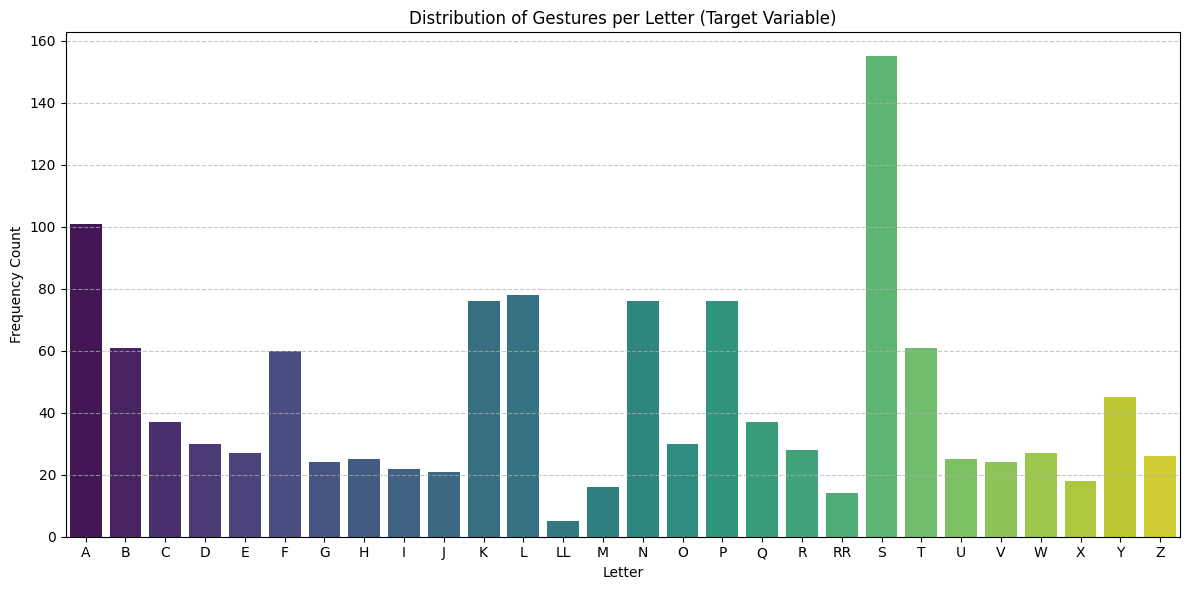

In [121]:
letter_order = gestures_df['label'].value_counts().sort_index().index

plt.figure(figsize=(12, 6))
sns.countplot(data=gestures_df, x='label', hue='label', order=letter_order, palette='viridis')

plt.title('Distribution of Gestures per Letter (Target Variable)')
plt.xlabel('Letter')
plt.ylabel('Frequency Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


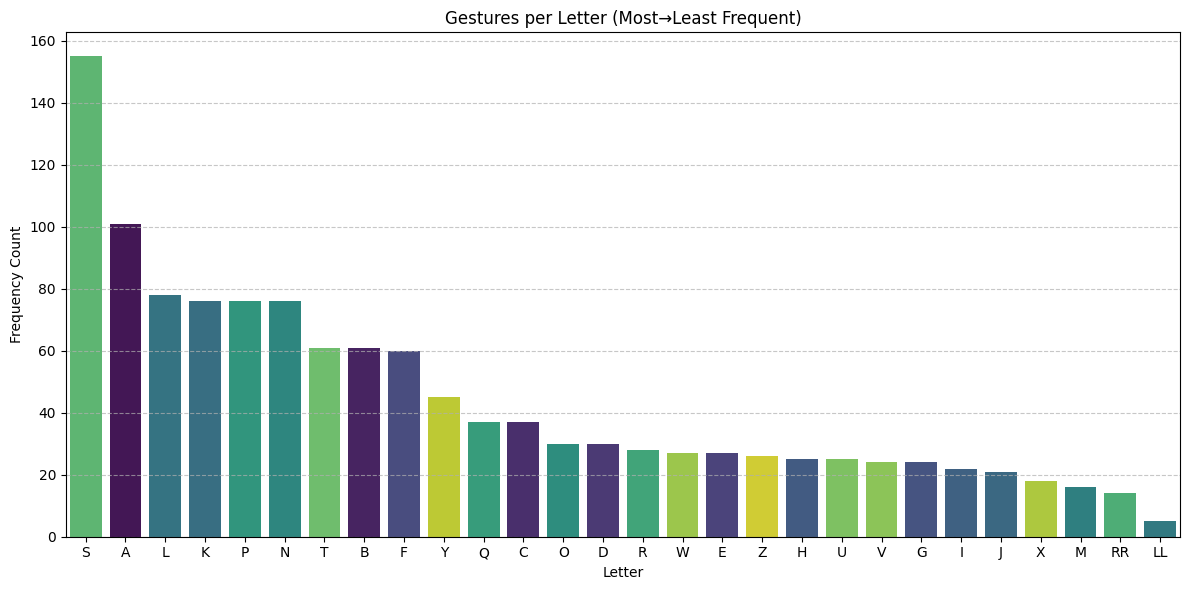

In [122]:
letter_order_desc = gestures_df['label'].value_counts().index

plt.figure(figsize=(12, 6))
sns.countplot(
    data=gestures_df,
    x='label',
    hue='label', 
    order=letter_order_desc,
    palette='viridis',
)
plt.title('Gestures per Letter (Most→Least Frequent)')
plt.xlabel('Letter')
plt.ylabel('Frequency Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

1. **Strong class imbalance**

   * The letter **S** dominates with \~180 samples, and **A**, **N**, **K**, **L**, **P** each have between \~80–130.
   * By contrast, digraphs like **LL** and **RR** have only \~6 and \~15 samples, respectively, and many single letters sit below 30–40.

2. **Long‐tailed distribution**

   * A handful of letters account for most of the data, while a long tail of letters are under-represented.
   * This will bias a classifier toward the frequent classes unless you apply balancing strategies.

3. **Implications for modeling**

   * **Minority classes** (e.g. LL, RR, I, etc.) will likely be learned poorly.
   * One of the strategies to solve this issue is to consider **oversampling** (SMOTE, augmentation) or **class-weighting** to give those rare classes a fighting chance.

4. **Next steps**

   * We have to focus to generate synthetic data (e.g. flip/rotate images) to boost the low-frequency letters.
   * Finally, monitor per-class metrics (precision/recall) rather than overall accuracy to ensure fairness across all letters.


# **Bivariate analysis**
Numeric vs. Categorical

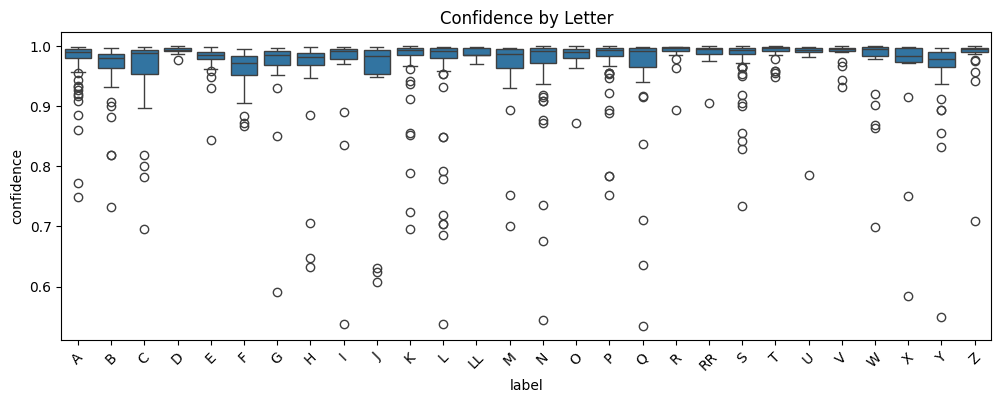

In [123]:
plt.figure(figsize=(12,4))
sns.boxplot(x='label', y='confidence', data=gestures_df)
plt.xticks(rotation=45)
plt.title("Confidence by Letter")
plt.show()


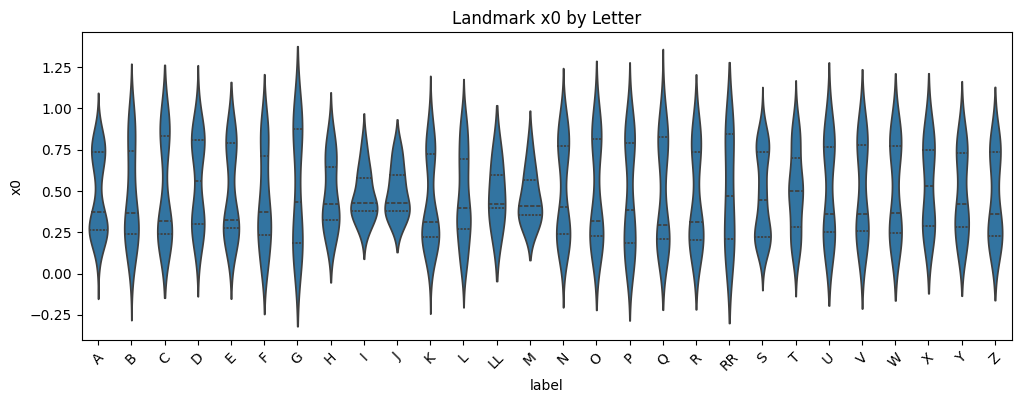

In [124]:
plt.figure(figsize=(12,4))
sns.violinplot(x='label', y='x0', data=gestures_df, inner='quartile')
plt.xticks(rotation=45)
plt.title("Landmark x0 by Letter")
plt.show()

Categorical vs. Categorical

In [125]:
ct = pd.crosstab(gestures_df['label'], gestures_df['handedness'])
display(ct)


handedness  left  right
label                  
A             45     56
B             22     39
C             16     21
D             15     15
E             11     16
F             25     35
G             11     13
H              9     16
I              8     14
J             11     10
K             33     43
L             32     46
LL             2      3
M              5     11
N             35     41
O             13     17
P             34     42
Q             19     18
R             13     15
RR             6      8
S             64     91
T             29     32
U             12     13
V             11     13
W             12     15
X              9      9
Y             22     23
Z             11     15

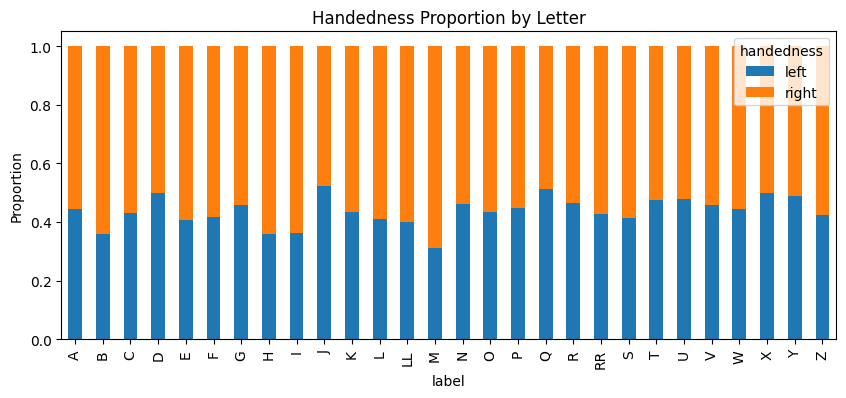

In [126]:
ct_norm = ct.div(ct.sum(axis=1), axis=0)
ct_norm.plot(kind='bar', stacked=True, figsize=(10,4))
plt.title("Handedness Proportion by Letter")
plt.ylabel("Proportion")
plt.show()


Numeric vs. Numeric by Category

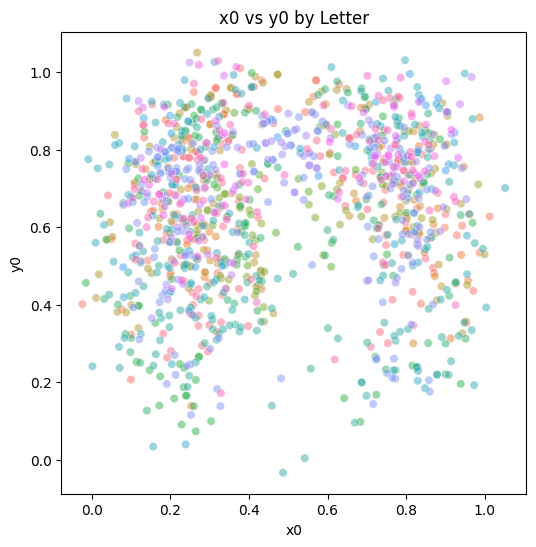

In [127]:
# Scatter plot with hue
plt.figure(figsize=(6,6))
sns.scatterplot(x='x0', y='y0', hue='label', data=gestures_df, legend=False, alpha=0.5)
plt.title("x0 vs y0 by Letter")
plt.show()


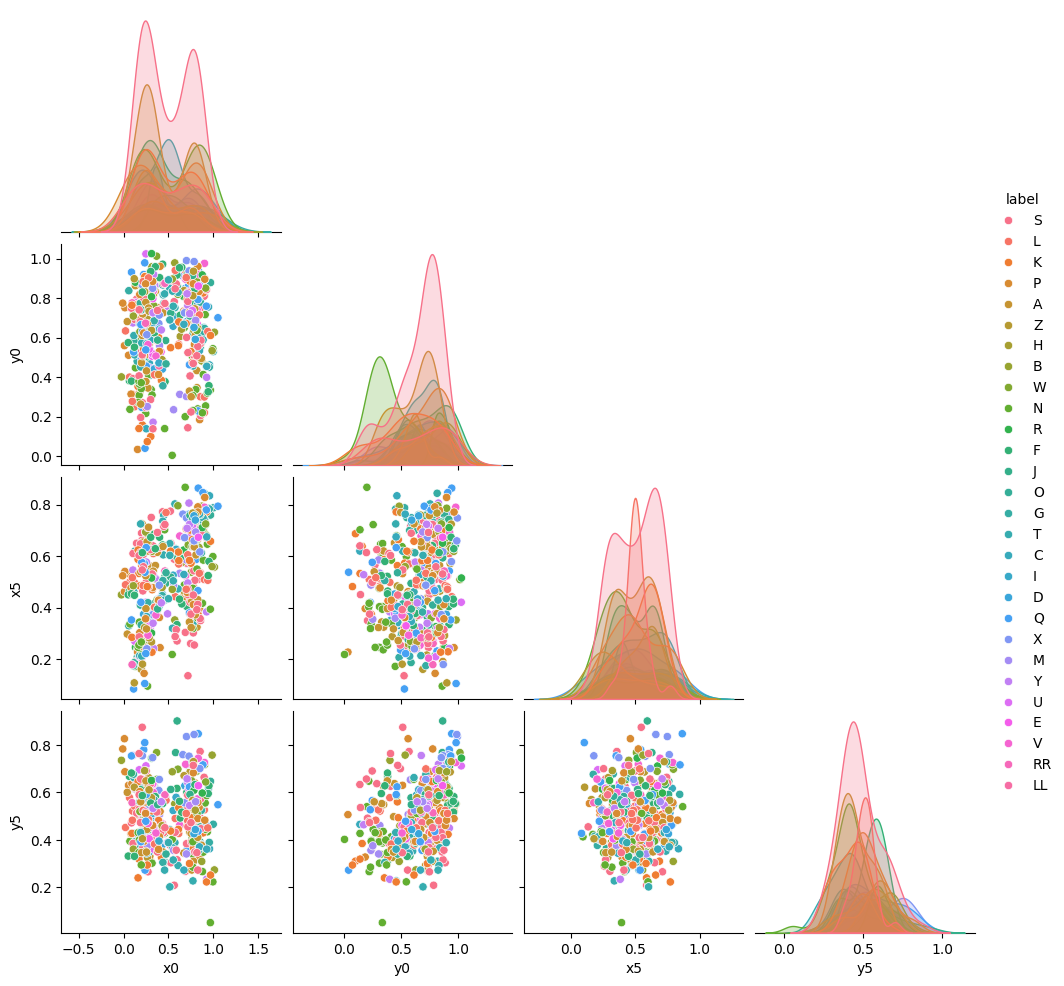

In [128]:
sample = gestures_df.sample(500)
sns.pairplot(sample, vars=['x0','y0','x5','y5'], hue='label', corner=True)
plt.show()


Derived Features by Category

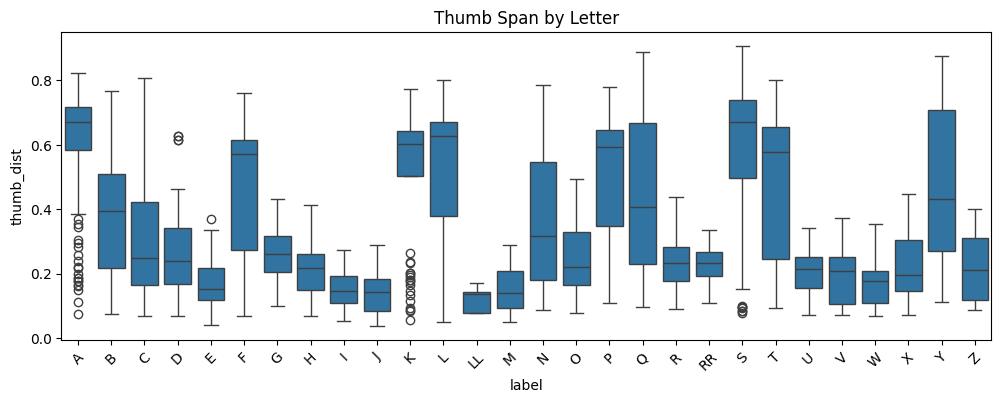

In [129]:
# Example: boxplot of thumb span by letter
plt.figure(figsize=(12,4))
sns.boxplot(x='label', y='thumb_dist', data=gestures_df)
plt.xticks(rotation=45)
plt.title("Thumb Span by Letter")
plt.show()


# Correlation Analysis (Numerical Variables)


--- Bi/Multivariate Analysis: Correlation Matrix ---


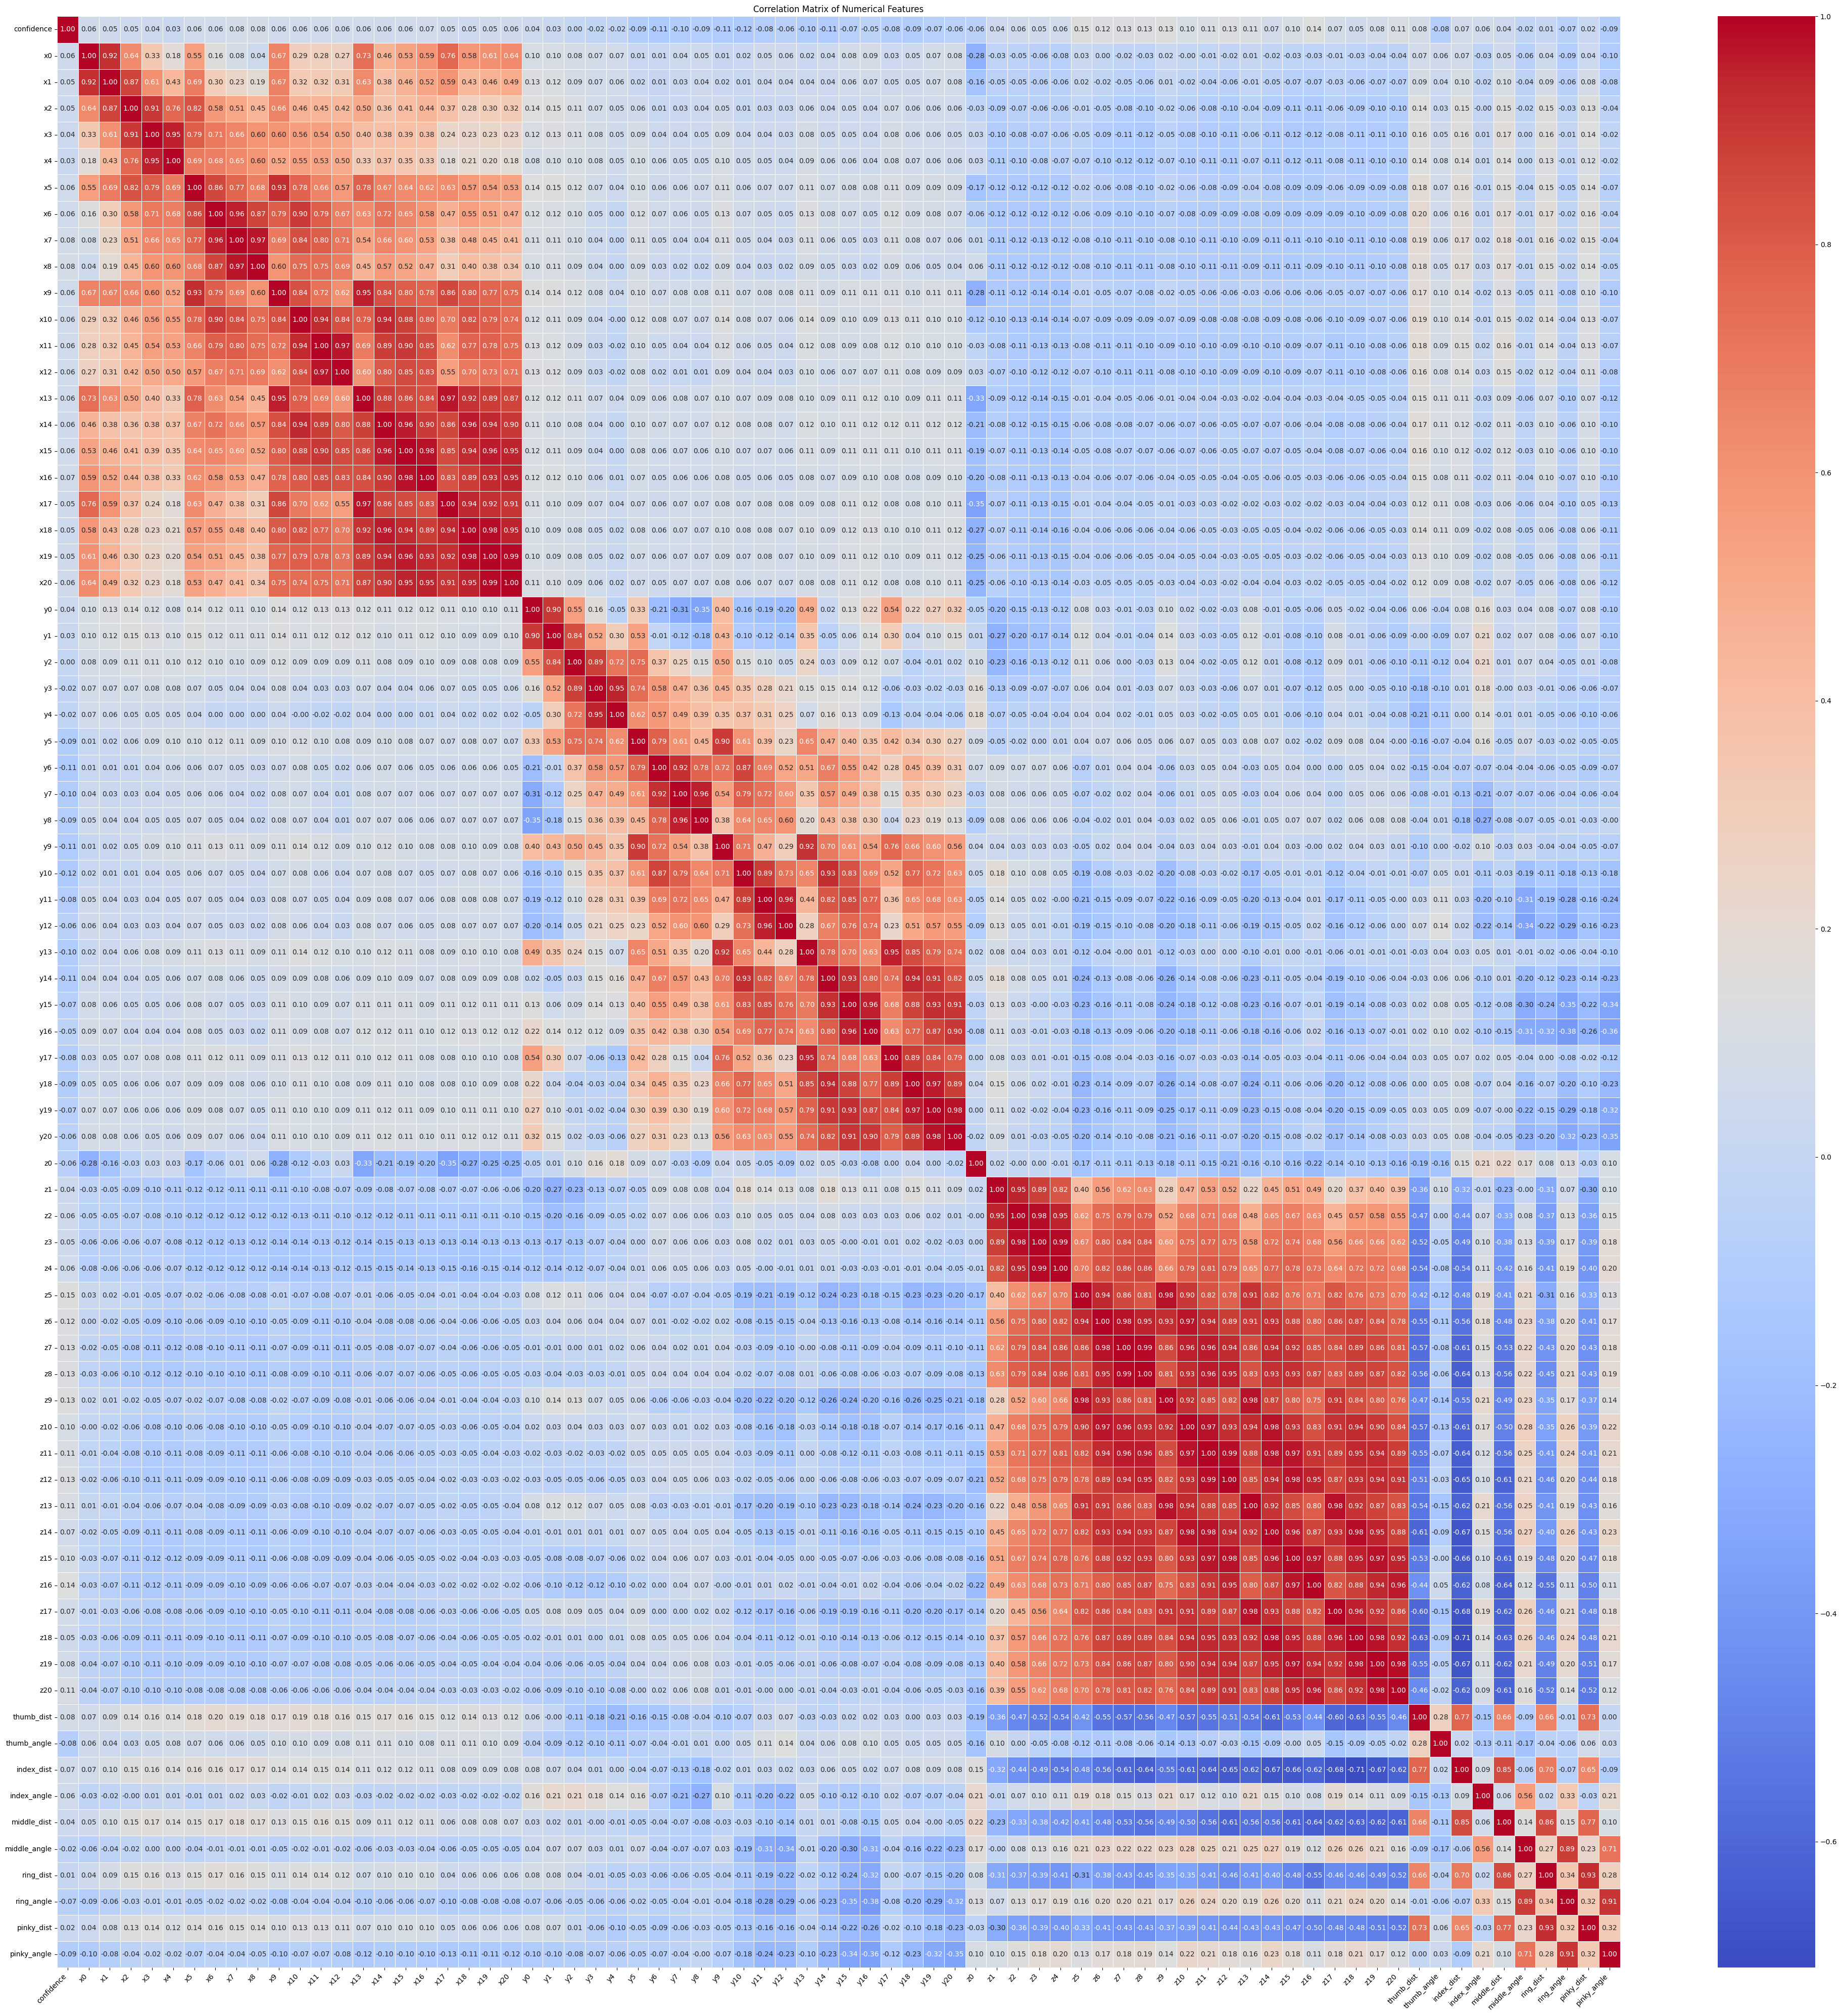


Correlation Matrix Values:
|              | confidence   | x0          | x1         | x2          | x3         | x4         | x5         | x6          | x7          | x8         | x9         | x10         | x11        | x12        | x13        | x14        | x15        | x16        | x17         | x18        | x19        | x20        | y0          | y1          | y2          | y3          | y4          | y5          | y6         | y7         | y8          | y9          | y10         | y11         | y12        | y13         | y14        | y15         | y16         | y17         | y18        | y19         | y20        | z0          | z1          | z2          | z3          | z4          | z5          | z6         | z7          | z8         | z9         | z10         | z11        | z12        | z13        | z14         | z15         | z16         | z17        | z18         | z19         | z20         | thumb_dist   | thumb_angle   | index_dist   | index_angle   | middle_dist   | middle_a

In [130]:

print("\n--- Bi/Multivariate Analysis: Correlation Matrix ---")
# Calculate correlation matrix (default method='pearson', handles NaNs by pairwise deletion)
correlation_matrix = gestures_df[numerical_columns].corr()

plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nCorrelation Matrix Values:")
print(correlation_matrix.to_markdown(numalign="left", stralign="left"))
print("\nNote: Correlations involving avg_rh_* and avg_lh_* are calculated pairwise, only using rows where both variables are non-NaN.")

1. **Distinct X, Y, Z Blocks**
   The x-coordinates (x0…x20) form a tightly correlated cluster, as do the y-coordinates and, to a lesser extent, the z-coordinates. This indicates substantial redundancy within each axis: a shift in one fingertip along a given axis tends to coincide with similar shifts in all other fingertips on that same axis.

2. **Weak Cross-Axis Relationships**
   Correlations between x and y are mild (≈0.1–0.3), and those between x/z or y/z hover around zero or slightly negative. This reflects that most gestures occur within the image plane, while depth (z) varies relatively independently.

3. **Moderate Grouping of Distance Features**
   The five `*_dist` features correlate moderately (≈0.3–0.6) with one another, confirming that fingers tend to open and close together, so each distance-from-wrist measure carries largely overlapping information.

4. **Highly Coupled Angle Features**
   The five `*_angle` features exhibit very strong inter-correlations (reds approaching 0.8–1.0). Joint angles move in near lock-step, suggesting that retaining all five angles may over-represent the same underlying motion.

5. **Inverse Distance-Angle Relationship**
   Negative correlations between certain distances and angles validate that as a finger folds (angle increases), its distance from the wrist correspondingly decreases.

---

**Next Steps**

* **Dimensionality Reduction:** Apply PCA or similar techniques within each axis block to collapse redundant landmarks.
* **Feature Selection:** Retain only a subset of distances and angles (e.g., one or two per category) to minimize over-representation.
* **Depth Evaluation:** Assess whether the z-axis adds discriminative power; if not, drop or down-weight it.
* **Composite Metrics:** Create summary features (e.g., overall “hand spread” or average “curl” angle) to further condense the feature space without losing key gesture information.


---

# Conclusions

This Exploratory Data Analysis was conducted on the `gestures.json` dataset, incorporating updated processing steps for the landmark data structure. We reamind to everyone that the script that generates the Json file is still in progress so the distribution of the data could change in the future. Here's a summary addressing the key EDA questions:

---

## Data Structure

- The dataset initially contained **1,724 entries**. After processing and cleaning, **1,716 entries** (static images) remained.
- Columns include:
  - **Gesture information**: `letter`, `gesture_type`
  - **Detection details**: `hand_count`, `handedness_detected`, `right_hand_confidence`, `left_hand_confidence`
  - **Extracted landmark features**: `num_rh/lh_landmarks`, `avg_rh/lh_x/y/z`
  - **Timestamp**
- Descriptive statistics showed:
  - Expected confidence values in **[0, 1]**
  - Landmark coordinates mostly in **[0, 1]** for x/y
  - Landmark count values as **0 or 21** after cleaning

---

## Missing Values

- **High missingness** in `video`, `fps`, `total_frames` (>99%)
- `image` and `handedness_detected`: **8 missing values**
- NaNs in confidence and landmarks matched undetected hands

**Pattern & Handling**:
- The 8 rows missing `image`/`handedness` were identified as problematic **video entries**
- Actions taken:
  - Dropped the 8 problematic rows
  - Dropped high-missingness and redundant identifier columns
  - Imputed confidence NaNs with **0**
  - Retained landmark NaNs to signify **hand absence**

---

## Outliers

- Found extreme outliers in `hand_count` (up to 100) within problematic video rows
- These were removed during cleaning
- **Box plots** showed potential outliers in landmark coordinates, retained as they may reflect valid variations

---

## Cardinality

- `letter`: **28 unique values**
- `gesture_type`: **2 unique values**
- `handedness_detected`: **3 unique values** (`left`, `right`, `both`)

No high cardinality issues requiring special preprocessing were found.

---

## Skewed Distributions & Transformations

- **Skewness** observed:
  - `avg_rh_y`: 1.12
  - `avg_rh_z`: -1.16
  - `avg_lh_z`: -1.89
  - `avg_lh_y`: 0.63 (moderate)

These features may require **log or Box-Cox transformations** in downstream modeling.

---

## Temporal Trends

- `timestamp` indicates data collection over ~13 minutes on **2025-05-05**
- Activity occurred in bursts (likely grouped by letter)
- No long-term trends

---

## Correlation (Dependent vs Independent)

- **Dependent variable**: `letter`
- **Strong negative correlation** between `left_hand_confidence` and `right_hand_confidence`: **-0.94**
- Moderate correlation:
  - `avg_rh_y` vs `avg_lh_y`: **-0.82** (when both hands are present)
- **Box plots**:
  - Show clear separability of letters using average landmark positions

---

## Data Distribution Across Categories

- Most frequent letter: **'S'**
- Most common `gesture_type`: **'static'**
- Most common `handedness_detected`: **'left'**
- Majority `hand_count`: **1**
- Crosstab shows **left-handed static gestures** are the most prevalent

---

## Image Normalization

- `avg_rh/lh_x/y` mostly in **[0, 1]**, consistent with **MediaPipe normalization**
- `avg_rh/lh_z` reflects depth, on a different scale
- Further normalization may benefit specific models but was not applied in this EDA

---

## Class Imbalance

- Significant imbalance:
  - 'S': **223 instances**
  - 'LL': **7 instances**
  - 'M': **20 instances**
- This will need correction during modeling using **resampling** or **class weighting**

---

## Summary

The EDA on the revised dataset:

- Identified and cleaned problematic entries
- Analyzed the distribution and relationships of critical features
- Highlighted:
  - **Class imbalance**
  - **Feature skewness**
  - **Potentially predictive landmark positions**
